In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dropout

In [4]:
from tensorflow.keras import utils  #用於分類資料轉換等 Keras 工具
np.random.seed(10) #設定隨機種子，讓每次程式產生的隨機值都一致

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# **資料預處理**

In [6]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255

In [8]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [9]:
x_train_image.shape

(50000, 32, 32, 3)

# **模型建立**

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Dropout(0.3))

In [13]:
model.add(Conv2D(32,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

In [14]:
model.add(MaxPool2D())

In [15]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [16]:
model.add(Dropout(0.3))

In [17]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [18]:
model.add(MaxPool2D())

In [19]:
model.add(Conv2D(128,(3,3),padding='same',
         activation='relu'))

In [20]:
model.add(Dropout(0.3))

In [21]:
model.add(Conv2D(128,(3,3),padding='same',
         activation='relu'))

In [22]:
model.add(MaxPool2D())

In [23]:
model.add(Flatten())

In [24]:
model.add(Dropout(0.3))

In [25]:
model.add(Dense(
    units = 2500,
    kernel_initializer='normal',
    activation='relu'))

In [26]:
model.add(Dropout(0.3))

In [27]:
model.add(Dense(
    units = 1500,
    kernel_initializer='normal',
    activation='relu'))

In [28]:
model.add(Dropout(0.3))

In [29]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [30]:
print(model.summary())  # 檢查用

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2500)           │     5,122,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     3,751,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,176,018 (35.00 MB)

 Trainable params: 9,176,018 (35.00 MB)

 Non-trainable params: 0 (0.00 B)

None


# **訓練模型**

In [31]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [32]:
train_history = model.fit(
    x = x_Train_normalize,         # 訓練資料（特徵）→ 已經標準化
    y = y_Train_OneHot,            # 訓練標籤（目標）→ One-hot 編碼
    validation_split = 0.2,        # 20% 訓練資料作為驗證資料（不用額外給 validation set）
    epochs = 50,                   # 訓練 10 輪（整份資料訓練 10 次）
    batch_size = 128,              # 每批次送入 400 筆資料
    verbose = 2,                   # 顯示訓練過程資訊（2 表示精簡模式：每輪顯示一行）
)

Epoch 1/50
313/313 - 26s - 82ms/step - accuracy: 0.3207 - loss: 1.8221 - val_accuracy: 0.4343 - val_loss: 1.5289
Epoch 2/50
313/313 - 23s - 75ms/step - accuracy: 0.4725 - loss: 1.4312 - val_accuracy: 0.5401 - val_loss: 1.2678
Epoch 3/50
313/313 - 5s - 16ms/step - accuracy: 0.5538 - loss: 1.2367 - val_accuracy: 0.6129 - val_loss: 1.1077
Epoch 4/50
313/313 - 5s - 16ms/step - accuracy: 0.6048 - loss: 1.1006 - val_accuracy: 0.6464 - val_loss: 1.0049
Epoch 5/50
313/313 - 5s - 18ms/step - accuracy: 0.6433 - loss: 1.0014 - val_accuracy: 0.6832 - val_loss: 0.9132
Epoch 6/50
313/313 - 10s - 33ms/step - accuracy: 0.6686 - loss: 0.9285 - val_accuracy: 0.6974 - val_loss: 0.8601
Epoch 7/50
313/313 - 5s - 17ms/step - accuracy: 0.6920 - loss: 0.8675 - val_accuracy: 0.7225 - val_loss: 0.7979
Epoch 8/50
313/313 - 10s - 32ms/step - accuracy: 0.7124 - loss: 0.8115 - val_accuracy: 0.7128 - val_loss: 0.8266
Epoch 9/50
313/313 - 5s - 16ms/step - accuracy: 0.7270 - loss: 0.7638 - val_accuracy: 0.7392 - val_l

# **以圖形顯示訓練過程**

In [33]:
train_history.history

{'accuracy': [0.32065001130104065,
  0.47247499227523804,
  0.553849995136261,
  0.6048499941825867,
  0.6432999968528748,
  0.6685500144958496,
  0.6919749975204468,
  0.7124000191688538,
  0.7269750237464905,
  0.7398750185966492,
  0.7559750080108643,
  0.7678499817848206,
  0.7782999873161316,
  0.7895500063896179,
  0.7963250279426575,
  0.8075249791145325,
  0.8137500286102295,
  0.8204749822616577,
  0.8278999924659729,
  0.8339999914169312,
  0.839775025844574,
  0.8437250256538391,
  0.8501499891281128,
  0.8573499917984009,
  0.859749972820282,
  0.8665000200271606,
  0.8690500259399414,
  0.873324990272522,
  0.8770999908447266,
  0.8795250058174133,
  0.8775500059127808,
  0.8858749866485596,
  0.8848249912261963,
  0.8905500173568726,
  0.8915249705314636,
  0.8935750126838684,
  0.8971250057220459,
  0.8990749716758728,
  0.9014750123023987,
  0.9006249904632568,
  0.9070749878883362,
  0.902275025844574,
  0.9080749750137329,
  0.9077500104904175,
  0.9107000231742859,
 

In [34]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

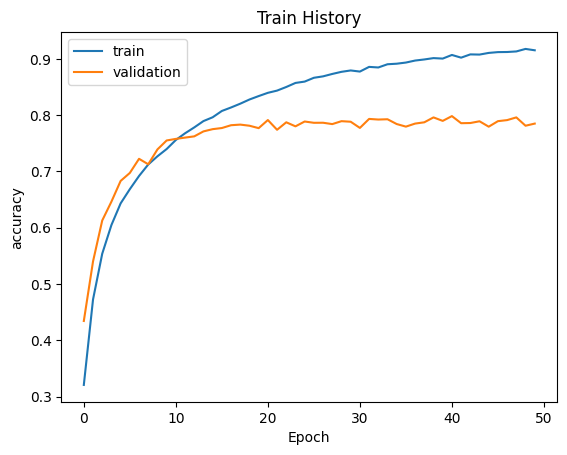

In [35]:
show_train_history(train_history,'accuracy','val_accuracy')

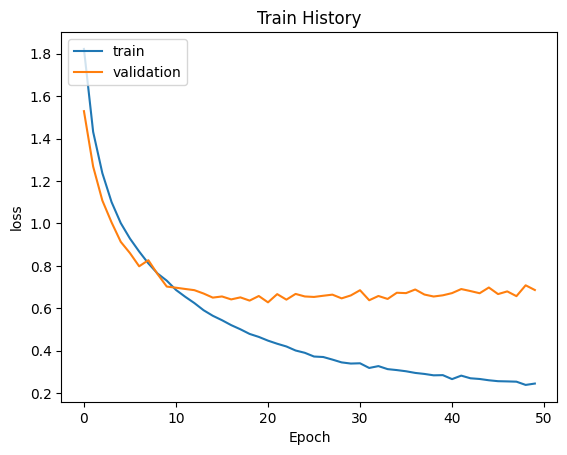

In [36]:
show_train_history(train_history,'loss','val_loss')

# **評估模型準確率**

In [38]:
scores = model.evaluate(x_test_image, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5129 - loss: 146.5251

accuracy= 0.5098999738693237


# **進行預測**

In [39]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [40]:
prediction=model.predict(x_test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [41]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(1)

神經網路預測是： car
實際是： car


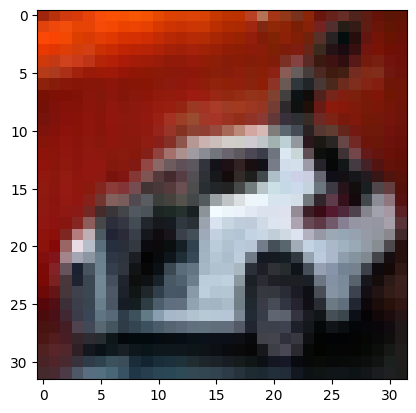

In [42]:
print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[6].item()])
plt.imshow(x_test_image[6], cmap='Greys');  # 測試圖片需reshape為原來32x32

In [43]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

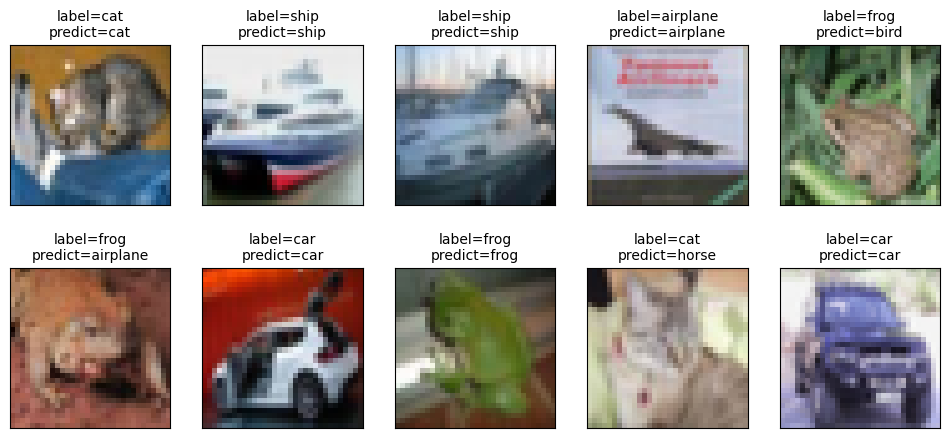

In [44]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# **confusion matrix (混淆矩陣)**

In [45]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,809,69,53,4,5,0,0,10,19,31
1,13,942,4,0,2,0,0,3,6,30
2,209,117,462,22,18,45,3,82,17,25
3,250,121,118,172,16,97,4,133,45,44
4,242,109,68,38,192,35,7,260,11,38
5,130,95,84,71,12,437,1,115,25,30
6,181,296,77,66,17,28,161,71,35,68
7,55,36,29,12,14,12,0,820,5,17
8,369,134,24,0,11,1,0,11,386,64


In [46]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,2
5,6,0
6,1,1
7,6,6
8,3,7
9,1,1


In [47]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict
33,5,3
101,5,3
460,5,3
550,5,3
553,5,3
...,...,...
8752,5,3
8869,5,3
8973,5,3
8997,5,3


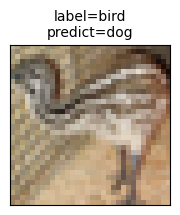

In [48]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

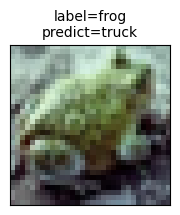

In [49]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [50]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [ ]:
model.save('/content/drive/My Drive/hw4-2_model.keras')

In [ ]:
!ls "/content/drive/My Drive"

 0785._javscat_PGFD-038.mp4				   IMG_6136.heic
 106級_深度自助旅遊網站建置-臺灣為例_20200706_final.docx   IMG_6137.heic
'1120812 CWT-64'					   IMG_6138.heic
'1120812 CWT-64 (1)'					   IMG_6139.heic
 112233							   IMG_6140.HEIC
'1209 10'						   IMG_6141.HEIC
 18校报录比22-24.rar					   IMG_6142.HEIC
 19148365-258e-4894-8a50-8b0f4b8b664f.pdf		   IMG_6143.HEIC
 3B032089阮彥翔						   IMG_6144.HEIC
 3B032089阮彥翔HW1					   IMG_6145.HEIC
 3B032089阮彥翔.zip					   IMG_6146.HEIC
 812CWT							   IMG_6147.HEIC
 818-FF41						   IMG_6148.HEIC
 919週記.gdoc						   IMG_6149.HEIC
 ac8276b06a01cc92.docx					   IMG_6150.heic
 C14-租約-230701-240630.xlsx				   IMG_6151.HEIC
'Colab Notebooks'					   IMG_6165.HEIC
 DIP							   IMG_6166.HEIC
 「DSC_9844.JPG」のコピー				   IMG_6168.HEIC
 「DSC_9849.JPG」のコピー				   IMG_6169.heic
 ERP配銷模組精選題庫.pdf				   IMG_6170.heic
 FF42							   IMG_6171.heic
'Google Earth'						   IMG_6172.HEIC
 hw3_model.keras					   IMG_6173.HEIC
 hw4-1_model.keras					   IMG_6174.HEIC
 hw4-2_model.keras					  